# Common Algorithms II - Linear Models

We first looked at k-nearest neighbors (k-NN) and applied it to a simple dataset by using the Scikit-Learn implementation.
Scikit-Learn provides many more machine learning models, and all are relatively easy to use from a coding perspective {cite}`scikit-learn`.

The supervised models (see [the Scikit-Learn guide](https://scikit-learn.org/stable/supervised_learning.html)) are usually handled in a very similar way. We first train a model using `model.fit(X, y)` where `X` is our training data and `y` our targets or labels. Predictions on new data `X_new` are generated using `model.predict(X_new)`.

In most cases, the main difficulty is not the code part. It is the right choice of an algorithm and the proper preparation of the input data.
One thing that can lead to quite embarrassing outcomes, but also to drastic failure of a project, is the use of machine learning models without a proper understanding of how they work. A good data scientist will develop an intuition over time for what type of models work well for a certain task and dataset. This is nothing that can be developed within a few days or weeks, but we can set a good starting point here.

## Linear Models

Linear models are a cornerstone of machine learning, offering a simple yet powerful approach for both regression and classification tasks. They are based on the principle of a linear combination of input features to predict an output. These models are favored for their interpretability, computational efficiency, and the foundational role they play in understanding complex machine learning concepts.

## Linear Regression
Linear regression is one of the simplest and most fundamental machine learning algorithms. Whenever you had a calculator or a program to find a linear fit through many datapoints, that was, in principle, already a linear regression model. It is used for predictive modeling, specifically for forecasting a quantitative response based on one or more predictor variables (features). The essence of linear regression lies in fitting a linear equation to the observed data. The equation takes the form:

$$
 y=\beta_0​ + \beta_1 ​x_1 ​+ \beta_2 ​x_2​ + ... + \beta_n ​x_n ​+ \epsilon
$$

Here, $y$ represents the dependent variable we aim to predict, $x_1$, $x_2$, ... , $x_n$ are the independent variables (features), $\beta_0$ is the y-intercept, $\beta_1$, $\beta_2$,...,$\beta_n$ are the coefficients that represent the weight of each feature in predicting the target variable, and $\epsilon$ is the error term, capturing the difference between the observed and predicted values.

The goal of linear regression is to find the best-fitting line through the data points that minimizes the sum of the squared differences between the observed and predicted values, known as the least squares criterion.

**But how does the algorithm learn from the data?**
Linear regression "learns" from the data by adjusting the coefficients ($β$ values) to minimize the cost function, typically the mean squared error (MSE) between the predicted and actual values of the dependent variable. The learning process involves solving for the coefficients that result in the best fit. This can be achieved through various methods, including gradient descent or more direct mathematical approaches like the Ordinary Least Squares (OLS) method. Such a process is an iterative process, as illustrated in {numref}`fig_linear_regression_fitting`.

The illustrated example used one-dimensional data ($x_1$) which is used to model a one-dimensional label ($y$). Here, only $\beta_0$ and $\beta_1$ would need to be learned. In practice, however, most datasets we use will be of much higher dimensionality and the resulting models will have to learn many coefficients.

```{figure} ../images/fig_linear_regression_fitting.png
:name: fig_linear_regression_fitting

The coefficients of the linear model are learned by an iterative optimization process. A common procedure for this is the minimization of the mean squared error (errors are indicated by the yellow lines). 
```

---


### Pros, Cons, Caveats

One of the main advantages of Linear Regression models lies in the simplicity of the concept. It is very easy to understand what such a model does, and computationally, it is very efficient.

Unlike k-NN, linear regression models learn one coefficient per input feature. As a result, such linear models are not sensitive to features of different scales, and rescaling is not required. 

However, linear models come with some important limitations.  
Their main issue is, that they are often just *too* simple to describe data well enough because, very often, relationships between features or features and labels are not linear {numref}`fig_linear_regression_issues`. And, in contrast to k-NN, linear models can output predictions that are nonsensical or impossible (e.g. negative heights, prices, physically impossible temperatures etc.). Since they will always output something, they also come at a risk of making overconfident predictions, so predictions for datapoints that are very different from all training samples.

```{figure} ../images/fig_linear_regression_issues.png
:name: fig_linear_regression_issues

The coefficients of the linear model are learned by an iterative optimization process. A common procedure for this is the minimization of the mean squared error (errors are indicated by the yellow lines). 
```

**Pros:**

- **Simplicity and interpretability:** The linear regression model is straightforward to understand and interpret, making it an excellent starting point for predictive modeling.
- **Computational efficiency:** It is computationally inexpensive to train and predict with linear regression, allowing it to handle large datasets effectively.
- **Continuous and categorical data:** It can handle both types of data, with categorical variables often incorporated through dummy coding.

**Cons:**

- **Assumption of linearity:** The biggest limitation is the assumption that there is a linear relationship between the dependent and independent variables. This assumption does not hold for many real-world scenarios.
- **Outliers sensitivity:** Linear regression is sensitive to outliers in the data, which can significantly affect the regression line and coefficients.
- **Impossible predictions & Overconfidence:** Linear models can easily output values far outsize the desired or possible ranges. This is here linked to over-confidence when data is used with the model that is far away from all training data.

## Hands-on Example

We here again work with the [`Penguin Dataset`](https://allisonhorst.github.io/palmerpenguins/) {cite}`penguins`. But instead of predicting the species (which is a categorical value), we will try to predict numerical values. 
This will create a *regression* task instead of a classification task.

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

### Data Inspection & Cleaning

In [2]:
filename = "../datasets/penguins_size.csv"  # contains some changes with respect to the original dataset!
data = pd.read_csv(filename)

In [3]:
data = data.dropna()

label_name = "flipper_length_mm"
y = data[label_name]
X = data.drop(["species", "island", label_name], axis=1)
X["sex"] = 1 * pd.get_dummies(X["sex"])["FEMALE"]
X = X.rename(columns={"sex": "female"})
X.head()

,culmen_length_mm,culmen_depth_mm,body_mass_g,female
0,39.1,18.7,3750.0,0
1,39.5,17.4,3800.0,1
2,40.3,18.0,3250.0,1
4,36.7,19.3,3450.0,1
5,39.3,20.6,3650.0,0


### Train/Test split

As done before, we will simply split the data into a training set and a test set.

In [4]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# Let's check the outcome dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 4), (84, 4), (250,), (84,))

### Train a model (and make predictions)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### What has the model "learned"?
Our model takes numerical input, in this case with 4 dimensions (4 features --> see `X_train.shape`).  
Through the training, which here is simply an optimization of the linear fit, our model has then learned one coefficient per input. These are the before-mentioned values for $\beta_1$ to $\beta_4$ in this case.

In [7]:
model.coef_

array([ 0.56942041, -1.5552058 ,  0.01114168, -0.02814116])

The model has also learned the y-intercept $\beta_0$:

In [8]:
model.intercept_

156.04773034515992

**Compute predictions**  
Just as before with the k-NN model, we can simply create predictions on any data of the expected size (here: 4 features).

In [9]:
predictions = model.predict(X_test)
predictions

array([193.36801925, 186.90095107, 186.96514261, 216.78177533,
       192.5010084 , 218.96978654, 187.11302035, 188.36432361,
       184.62538673, 223.42560836, 204.29932642, 195.77336369,
       182.2866393 , 182.74081935, 185.65632772, 185.16122669,
       190.24214572, 209.81139846, 196.76588675, 191.91914093,
       190.01785114, 192.53351504, 212.30073619, 219.58809295,
       226.64536711, 212.19702546, 222.7882205 , 224.88228114,
       196.79434262, 194.28741805, 191.54089813, 190.14804443,
       191.95268066, 187.10027097, 221.95745147, 187.2304965 ,
       195.75156967, 199.25900799, 209.14328103, 189.30897673,
       195.24710661, 186.65085722, 221.30229292, 207.25208685,
       195.39348974, 218.42292117, 198.16769688, 222.22600408,
       189.14585881, 187.70453709, 199.97435282, 191.37207844,
       208.85914802, 186.89632311, 219.34255409, 191.10136301,
       193.81986592, 189.7923519 , 193.03099497, 216.95602953,
       193.49050434, 224.38722562, 187.15019287, 222.91

### Model evaluation

Unlike for classification, we don't have a simpe distinction between right (correct class was predicted) and wrong. In most cases, we will not even expect our model to make perfect predictions, but predictions which in most cases come very close to the true values.

This can be tested in several ways. Here, we will do two very simple and easy-to-read tests. First, we just plot the predicted values against the true values in a scatter plot:

Text(0.5, 0, 'Predicted label')

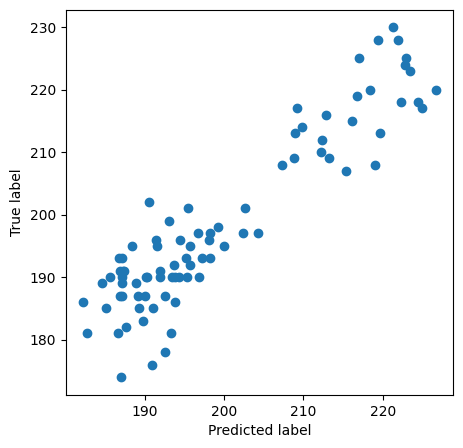

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(predictions, y_test)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted label")

We can also look at the prediction errors, which simply is `y_test - predictions`.  
A histogram can quickly show us by how far our model predictions are off.

Text(0.5, 1.0, 'Prediction errors')

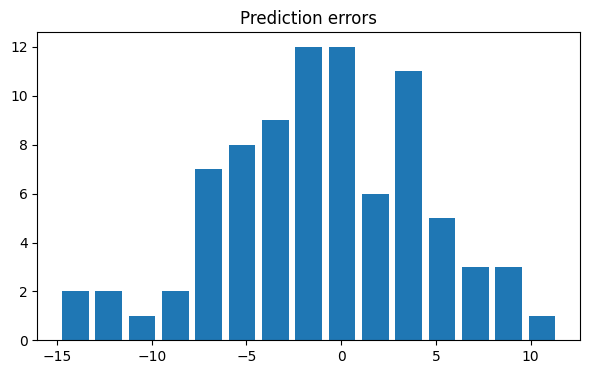

In [11]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.hist(y_test - predictions, bins=15, rwidth=0.8)
ax.set_title("Prediction errors")

In this example we see that most predictions are off by no more than +- 5.

## Logistic Regression
Logistic regression, despite its name, is not used for regression tasks. Instead, it is a classification algorithm, primarily used when the dependent variable is binary or categorical. It is a powerful statistical method used to model the probability of a certain class or event existing. Like linear regression, logistic regression models the relationship between a set of independent variables and a dependent variable. However, instead of fitting a line to the data, it uses a logistic function to output a probability value that is used for classification.

### The Logistic Function
The core of logistic regression is the logistic function, also known as the sigmoid function. The logistic function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{−z}}
$$

where $z$ is the linear combination of input features, similar to linear regression:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

In this equation, $\beta_0$​ is the intercept, $\beta_1$, $\beta_2$, ..., $\beta_n$ are the coefficients, $x_1$, $x_2$, ..., $x_n$​ are the independent variables, and $e$ is the base of the natural logarithm.

The output of the logistic function, $\sigma(z)$, ranges between 0 and 1, making it suitable for binary classification. The probability $P$ of the dependent variable $y$ being 1 (or belonging to a particular class) is given by:

$$
P(y=1 ∣ x) = \sigma(z) = \frac{1}{1+e^{−(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}
$$​

### Decision Boundary

The probability output by the logistic function is often compared to a threshold value (commonly 0.5) to make a binary decision. If the predicted probability is greater than or equal to 0.5, the output class is 1; otherwise, it is 0. This threshold can be adjusted based on the specific problem and the cost of false positives and false negatives.

### Training the Model

Logistic regression is trained using a method called Maximum Likelihood Estimation (MLE). The goal of MLE is to find the values of the coefficients $\beta$ that maximize the likelihood of the observed data. This is done by iteratively adjusting the coefficients to minimize the difference between the predicted probabilities and the actual class labels in the training data.

The cost function for logistic regression is the log-loss (or binary cross-entropy), which measures the performance of the classification model:

$$
\text{Log-Loss} = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
$$

where $m$ is the number of observations, $y_i$ is the actual class label for observation $i$, and $p_i$ is the predicted probability for observation $i$.

### Pros, Cons, Caveats

#### Pros:

- **Interpretability:** Logistic regression provides clear and interpretable coefficients that indicate the strength and direction of the relationship between independent variables and the dependent variable.
- **Efficiency:** It is computationally efficient and scales well with large datasets.
- **Probabilistic Outputs:** Provides probabilistic predictions, which can be useful for decision-making processes that incorporate uncertainty.

#### Cons:

- **Linearity Assumption:** Assumes a linear relationship between the independent variables and the log-odds of the dependent variable, which may not hold in all cases.
- **Not Suitable for Complex Relationships:** Logistic regression may not perform well when the relationship between the independent and dependent variables is highly complex and non-linear.
- **Sensitivity to Outliers:** Like linear regression, logistic regression can be sensitive to outliers, which can affect the model's performance.

### Python Example: Logistic Regression with the Iris Dataset

Let's apply logistic regression to a well-known dataset, the Iris dataset. This dataset contains three classes of iris plants, but for simplicity, we will perform binary classification to distinguish one class from the others.

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# For binary classification, consider only two classes
binary_target_indices = y != 2  # Exclude class 2
X_binary = X[binary_target_indices]
y_binary = y[binary_target_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Logistic regression is a comparably simple model. It remains, however, a widely used algorithm in machine learning, and we will apply it in a later chapter to classify text documents.